In [ ]:
import torch
import numpy as np

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

In [2]:
import torch
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

#number of sub process to use for data loading
num_workers = 0
#samples per batch to load
batch_size = 20
#percentage of training set to use as validation
valid_size = 0.2

#convert data to a normalized torch.FloatTensor
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

#choose the training and test datasets
train_data = datasets.CIFAR10('data', train = True,
                             download = True, transform = transform)
test_data = datasets.CIFAR10('data', train = False,
                            download = True, transform = transform)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
#IF WE have only few data we can augment to make more data

In [ ]:
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20
# percentage of training set to use as validation
valid_size = 0.2

# convert data to a normalized torch.FloatTensor
transform_1 = transforms.Compose([
    transforms.RandomHorizontalFlip(), # randomly flip and rotate
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

transform_2 = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

# choose the training and test datasets
train_data = datasets.CIFAR10('data', train=True,
                              download=True, transform=transform_1)
test_data = datasets.CIFAR10('data', train=False,
                             download=True, transform =transform_2)

In [4]:
# obtain training indices that will be used for validation
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

#define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

#prepare data loaders 
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
                                          sampler = train_sampler, num_workers = num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
                                          sampler = valid_sampler, num_workers = num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,
                                         num_workers = num_workers)

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
#Visual a batch of training data

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

#un-normalize and display image
def imshow(img):
    img = img / 2 +0.5
    plt.imshow(np.transpose(img, (1, 2, 0)))

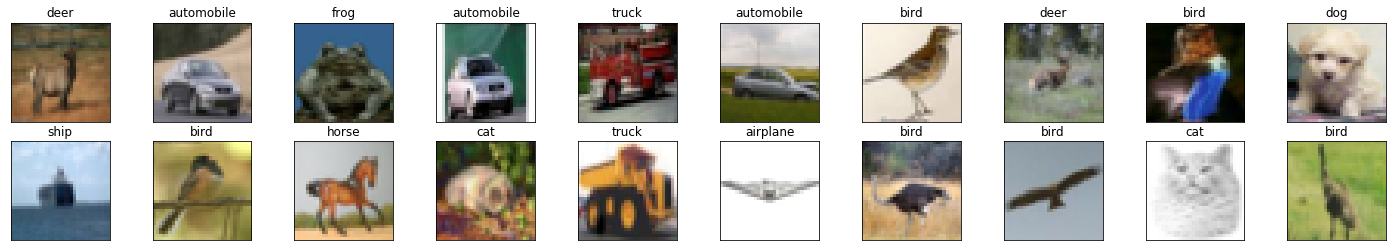

In [7]:
#obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

#plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize = (25, 4))
#display 20 images
for idx in np. arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])

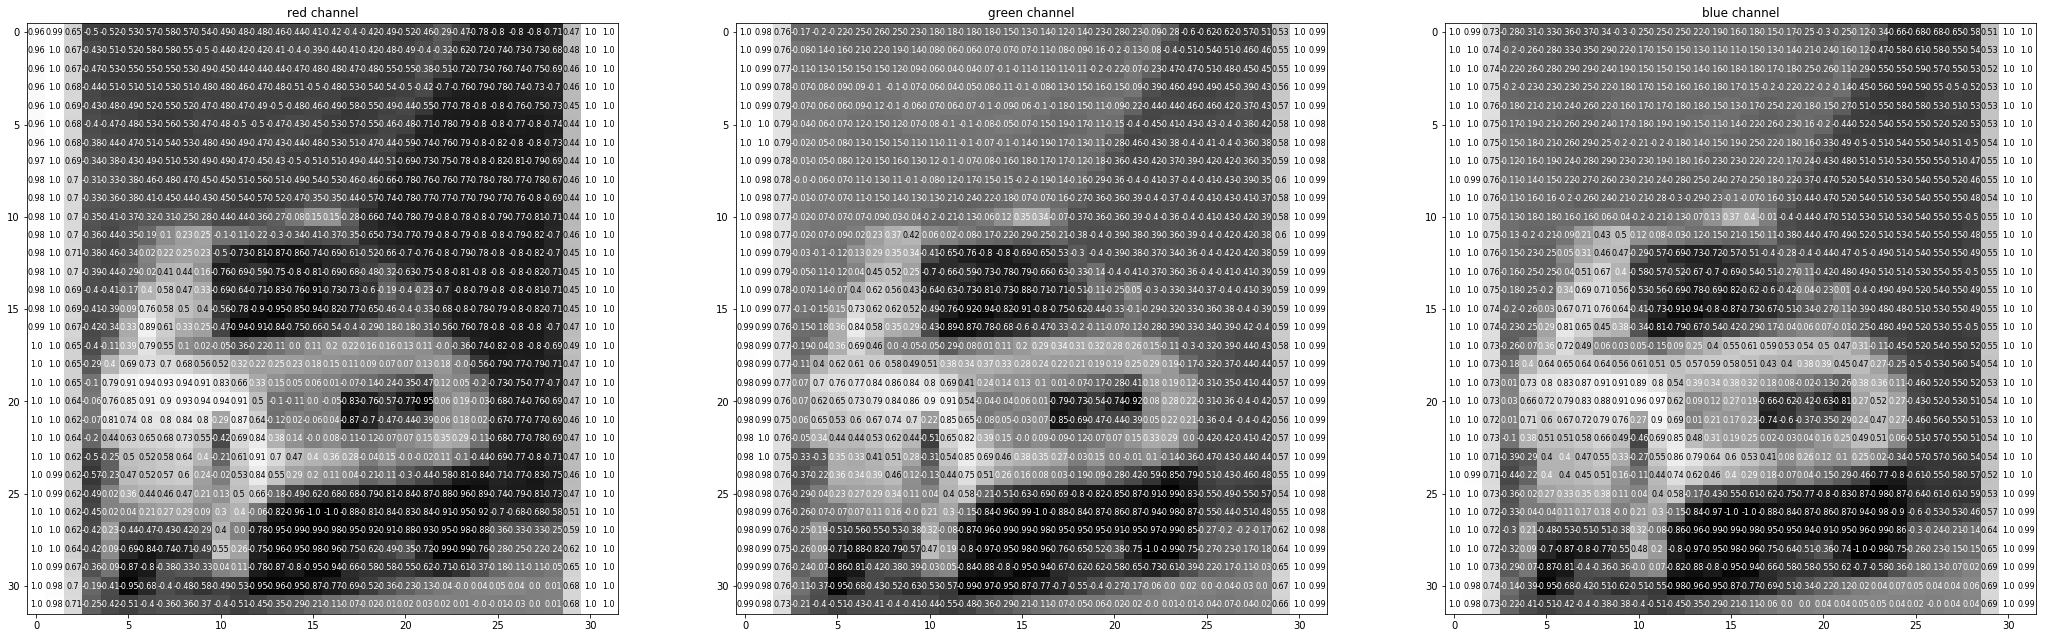

In [8]:
#view an image in more detail
rgb_img = np.squeeze(images[3])
channels = ['red channel', 'green channel', 'blue channel']

fig = plt.figure(figsize = (36, 36))
for idx in np.arange(rgb_img.shape[0]):
    ax = fig.add_subplot(1, 3, idx + 1)
    img = rgb_img[idx]
    ax.imshow(img, cmap = 'gray')
    ax.set_title(channels[idx])
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            val = round(img[x][y],2) if img[x][y] !=0 else 0
            ax.annotate(str(val), xy = (y,x), horizontalalignment = 'center',
                       verticalalignment = 'center', size = 8,
                       color = 'white' if img[x][y]<thresh else 'black')

In [11]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        #conv
        self.conv1 = nn.Conv2d(3, 16, 3, padding = 1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding = 1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding = 1)
        #max pooling layer
        self.pool = nn.MaxPool2d(2,2)
        
        #Linear layer
        self.fc1 = nn.Linear(64*4*4,500)
        self.fc2 = nn.Linear(500,10)
        
        #dropout layer (p=0.25)
        self.dropout = nn.Dropout(0.25)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        
        #flatten image input
        x = x.view(-1, 64*4*4)
        #dropout layer
        x = self.dropout(x)
        #add hidden layers
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        
        x = self.fc2(x)
        return x

model = Net()
print(model)

#if train_on_gpu:
#    model.cuda()

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
  (dropout): Dropout(p=0.25)
)


In [12]:
import torch.optim as optim

# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [ ]:
#train the model

In [13]:
# number of epochs to train the model
n_epochs = 30
valid_loss_min = np.Inf

for epoch in range(1, n_epochs + 1):
    train_loss = 0.0
    valid_loss = 0.0
    
    model.train()
    for data, target in train_loader:
        #if train_on_gpu:
            #data, target = data.cuda(), target.cuda()
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()*data.size(0)
        
    for data,target in valid_loader:
        #if train_on_gpu:
            #data, target = data.cuda(), target.cuda()
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        
        valid_loss += loss.item()*data.size(0)
    
    # calculate average losses
    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(valid_loader.sampler)
    
    # print training / validation statistics
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model_cifar.pt')
        
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 2.099027 	Validation Loss: 1.838529
Validation loss decreased (inf --> 1.838529).  Saving model ...
Epoch: 2 	Training Loss: 1.661016 	Validation Loss: 1.642509
Validation loss decreased (1.838529 --> 1.642509).  Saving model ...
Epoch: 3 	Training Loss: 1.466085 	Validation Loss: 1.436219
Validation loss decreased (1.642509 --> 1.436219).  Saving model ...
Epoch: 4 	Training Loss: 1.351908 	Validation Loss: 1.313129
Validation loss decreased (1.436219 --> 1.313129).  Saving model ...
Epoch: 5 	Training Loss: 1.259638 	Validation Loss: 1.280008
Validation loss decreased (1.313129 --> 1.280008).  Saving model ...
Epoch: 6 	Training Loss: 1.175606 	Validation Loss: 1.184825
Validation loss decreased (1.280008 --> 1.184825).  Saving model ...
Epoch: 7 	Training Loss: 1.104596 	Validation Loss: 1.137308
Validation loss decreased (1.184825 --> 1.137308).  Saving model ...
Epoch: 8 	Training Loss: 1.038437 	Validation Loss: 1.070876
Validation loss decreased (1.13730

In [14]:
#load the model
model.load_state_dict(torch.load('model_cifar.pt'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [15]:
# track test loss
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval()
#iterate over test data
for data, target in test_loader:
    #if train_on_gpu:
        #data, target = data.cuda(), target.cuda()
    output = model(data)
    loss = criterion(output, target)
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) #if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    
    #calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

#average test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.708626

Test Accuracy of airplane: 81% (812/1000)
Test Accuracy of automobile: 88% (882/1000)
Test Accuracy of  bird: 57% (574/1000)
Test Accuracy of   cat: 53% (534/1000)
Test Accuracy of  deer: 73% (732/1000)
Test Accuracy of   dog: 70% (701/1000)
Test Accuracy of  frog: 84% (844/1000)
Test Accuracy of horse: 80% (808/1000)
Test Accuracy of  ship: 85% (852/1000)
Test Accuracy of truck: 81% (812/1000)

Test Accuracy (Overall): 75% (7551/10000)


In [ ]:
#Visualize Sample Test Results

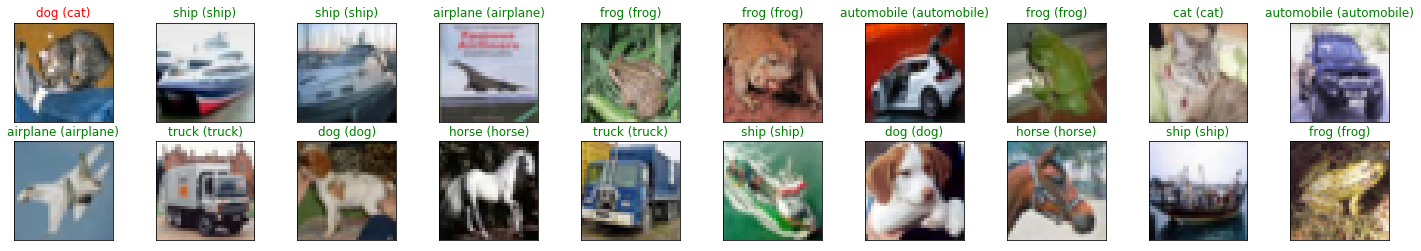

In [17]:
dataiter = iter(test_loader)
images, labels = dataiter.next()
images.numpy()

#if train_on_gpu:
    #images = images.cuda()
# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy()) #if not train_on_gpu else np.squeeze(preds_tensor.cpu().numpy())

#plot the images in the batch, along w predicted labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]),
                 color=("green" if preds[idx]==labels[idx].item() else "red"))
    